**Pizza Data Research**

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
p_data = pd.read_csv('data_dictionary.csv')
p_detail = pd.read_csv('order_details.csv')
p_orders = pd.read_csv('orders.csv', parse_dates=['date', 'time'])
p_type = pd.read_csv(open('pizza_types.csv', 'rU', encoding='windows-1252'))
pizzas = pd.read_csv('pizzas.csv')

df = pd.merge(p_detail, p_orders, on = "order_id")
df = pd.merge(df, pizzas, on='pizza_id')
df = pd.merge(df, p_type, on='pizza_type_id')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.8+ MB


1. Which pizza earns the company the most money?

In [152]:
pd.set_option('display.max_rows', 5000)

In [153]:
priceOrder = df.groupby(df.pizza_id)['price'].value_counts()
priceOrder.sort_values(ascending=False)
#big_meat_s is the most commonly sold pizza

pizza_id        price
big_meat_s      12.00    1811
thai_ckn_l      20.75    1365
five_cheese_l   18.50    1359
four_cheese_l   17.95    1273
classic_dlx_m   16.00    1159
spicy_ital_l    20.75    1088
hawaiian_s      10.50    1001
southw_ckn_l    20.75     993
bbq_ckn_l       20.75     967
bbq_ckn_m       16.75     926
ital_supr_m     16.50     920
pepperoni_m     12.50     918
cali_ckn_m      16.75     914
hawaiian_l      16.50     896
cali_ckn_l      20.75     895
mexicana_l      20.25     844
classic_dlx_s   12.00     786
pepperoni_s     9.75      739
ital_supr_l     20.75     735
sicilian_s      12.25     731
ital_cpcllo_l   20.50     715
pepperoni_l     15.25     712
ckn_alfredo_m   16.75     697
peppr_salami_l  20.75     680
veggie_veg_m    16.00     630
sicilian_l      20.25     596
green_garden_s  12.00     593
prsc_argla_m    16.50     585
four_cheese_m   14.75     577
pep_msh_pep_s   11.00     570
sicilian_m      16.25     560
spinach_fet_m   16.00     558
napolitana_l    20

In [154]:
df.pizza_id.value_counts()

big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
spicy_ital_l      1088
hawaiian_s        1001
southw_ckn_l       993
bbq_ckn_l          967
bbq_ckn_m          926
ital_supr_m        920
pepperoni_m        918
cali_ckn_m         914
hawaiian_l         896
cali_ckn_l         895
mexicana_l         844
classic_dlx_s      786
pepperoni_s        739
ital_supr_l        735
sicilian_s         731
ital_cpcllo_l      715
pepperoni_l        712
ckn_alfredo_m      697
peppr_salami_l     680
veggie_veg_m       630
sicilian_l         596
green_garden_s     593
prsc_argla_m       585
four_cheese_m      577
pep_msh_pep_s      570
sicilian_m         560
spinach_fet_m      558
napolitana_l       557
calabrese_m        554
the_greek_xl       544
southw_ckn_m       526
cali_ckn_s         493
ital_veggie_m      483
brie_carre_s       480
bbq_ckn_s          479
thai_ckn_s         476
thai_ckn_m         474
hawaiian_m         473
classic_dlx

2. What is the average numbers of pizzas ordered each day (average by year)

In [155]:
df.groupby(df.date)['order_id'].mean()

date
2015-01-01       32.919255
2015-01-02     1887.148936
2015-01-03     3554.171717
2015-01-04     5402.541353
2015-01-05     7208.296053
2015-01-06     9058.927778
2015-01-07    10828.798507
2015-01-08    12766.733333
2015-01-09    14601.013986
2015-01-10    16270.663158
2015-01-11    17905.040650
2015-01-12    19699.465116
2015-01-13      759.752137
2015-01-14      815.486111
2015-01-15      876.926829
2015-01-16      940.625806
2015-01-17     1002.049180
2015-01-18     1055.260504
2015-01-19     1107.877698
2015-01-20     1166.057554
2015-01-21     1226.393701
2015-01-22     1284.767742
2015-01-23     1354.060403
2015-01-24     1422.133803
2015-01-25     1473.079208
2015-01-26     1522.159292
2015-01-27     1584.154362
2015-01-28     1643.198276
2015-01-29     1696.321739
2015-01-30     1757.507246
2015-01-31     1816.832168
2015-02-01      102.150000
2015-02-02     1964.776224
2015-02-03     3607.398551
2015-02-04     5465.486111
2015-02-05     7276.912752
2015-02-06     9122.719

In [156]:
df.order_id.mean()

10701.479761415056

<AxesSubplot: xlabel='date', ylabel='order_id'>

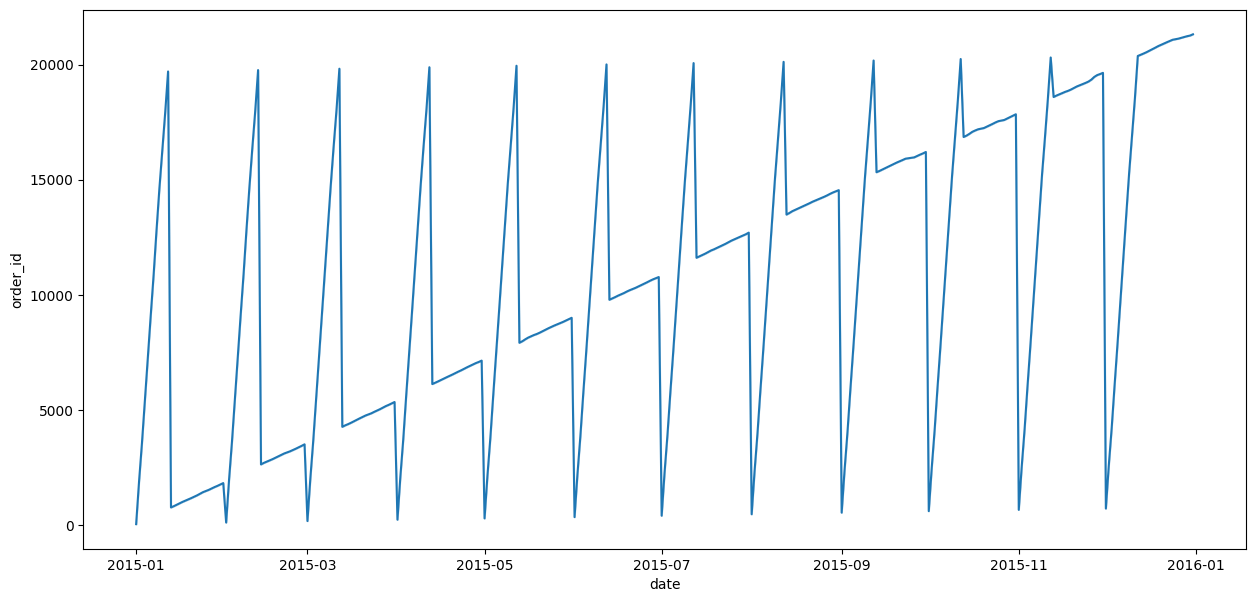

In [157]:
plt.subplots(figsize=(15, 7))
sns.lineplot(x=df.date, y=df.order_id)

#The only dips in the year are on the first day of the month (shown in groupby) They can try to get more sales on these days by providing a sale on the first day of the month

3. What pizza is ordered the least? Should it be cut from the menu?

In [158]:
df.pizza_id.value_counts(ascending=True)
#The greek_xxl sales barely any and is the only pizza to be served XXL which is an extra cost and incoviences the workers, so this pizza should defiently be cut from the menu

the_greek_xxl       28
green_garden_l      94
ckn_alfredo_s       96
calabrese_s         99
mexicana_s         160
ckn_alfredo_l      187
ital_veggie_l      190
ital_supr_s        194
the_greek_l        255
spinach_supr_m     266
soppressata_m      268
mediterraneo_m     271
ckn_pesto_m        274
calabrese_l        274
the_greek_m        279
spin_pesto_l       279
spinach_supr_l     280
spin_pesto_m       281
mediterraneo_s     288
soppressata_s      288
ckn_pesto_s        295
green_garden_m     300
the_greek_s        300
ital_cpcllo_s      300
ital_veggie_s      302
peppr_salami_s     318
mediterraneo_l     364
southw_ckn_s       366
pep_msh_pep_l      381
pep_msh_pep_m      391
ckn_pesto_l        392
spinach_supr_s     394
spin_pesto_s       397
ital_cpcllo_m      399
spicy_ital_s       399
spicy_ital_m       400
soppressata_l      401
prsc_argla_s       420
prsc_argla_l       423
veggie_veg_l       423
peppr_salami_m     424
napolitana_m       426
spinach_fet_l      437
spinach_fet

In [169]:
pizzas['size'].value_counts()

#there is only one large and only one extra large. These are both from the greek pizza

S      32
M      31
L      31
XL      1
XXL     1
Name: size, dtype: int64

4. What is the average number of pizzas ordered at once?

In [160]:
x=df.order_id.value_counts()
x.mean()

#The Pizza shop could run a sells promotion by providing a free drink when ordering three or more pizzas. This would help infuce customers spending habits and sell more pizzas

2.2772833723653396

In [192]:
print('percent =', (df.order_id>2).sum()/df.order_id.sum()*100)

#percentage of people ordering more than two pizzas

percent = 0.009343348922635606


5. What is the average price of each pizza for each size?

<AxesSubplot: xlabel='size', ylabel='price'>

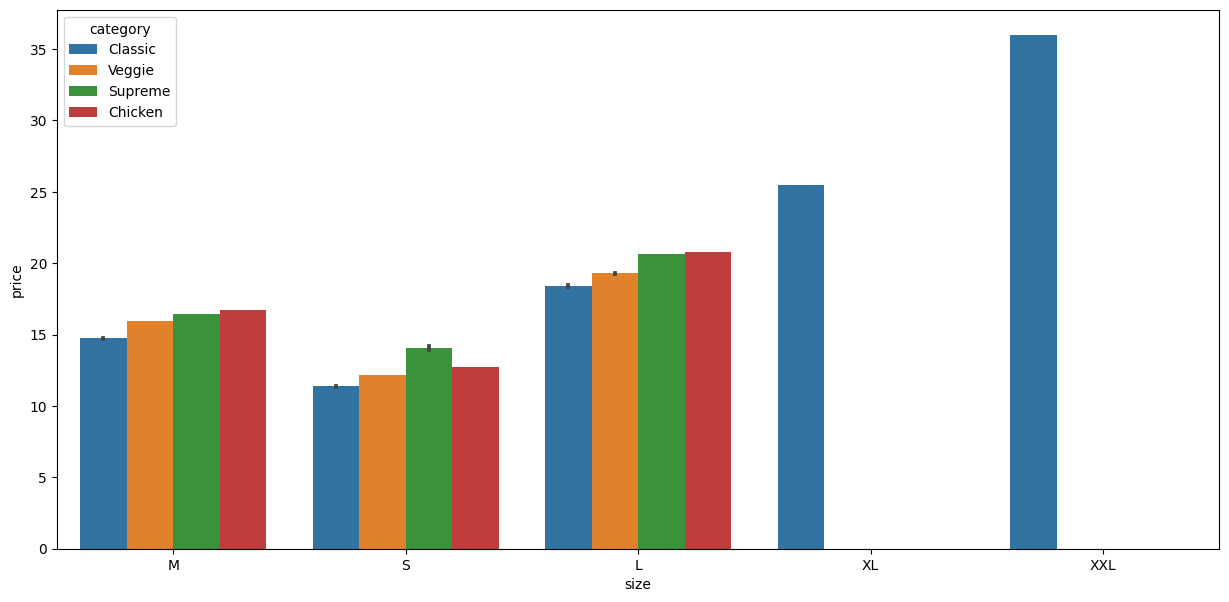

In [178]:
plt.subplots(figsize=(15, 7))
sns.barplot(x=df['size'], y=df.price, hue=df.category)

#This is very smart because people will naturally order the medium and the slight variation will encorage people to order the large

6. What is the most common pizza category?

In [186]:
df.groupby(df.category)['order_details_id'].sum()/df.order_details_id.sum()*100

category
Chicken    22.307784
Classic    30.080312
Supreme    24.231692
Veggie     23.380212
Name: order_details_id, dtype: float64

7. What time of day are the most pizzas ordered?

(1.0, 1.05)

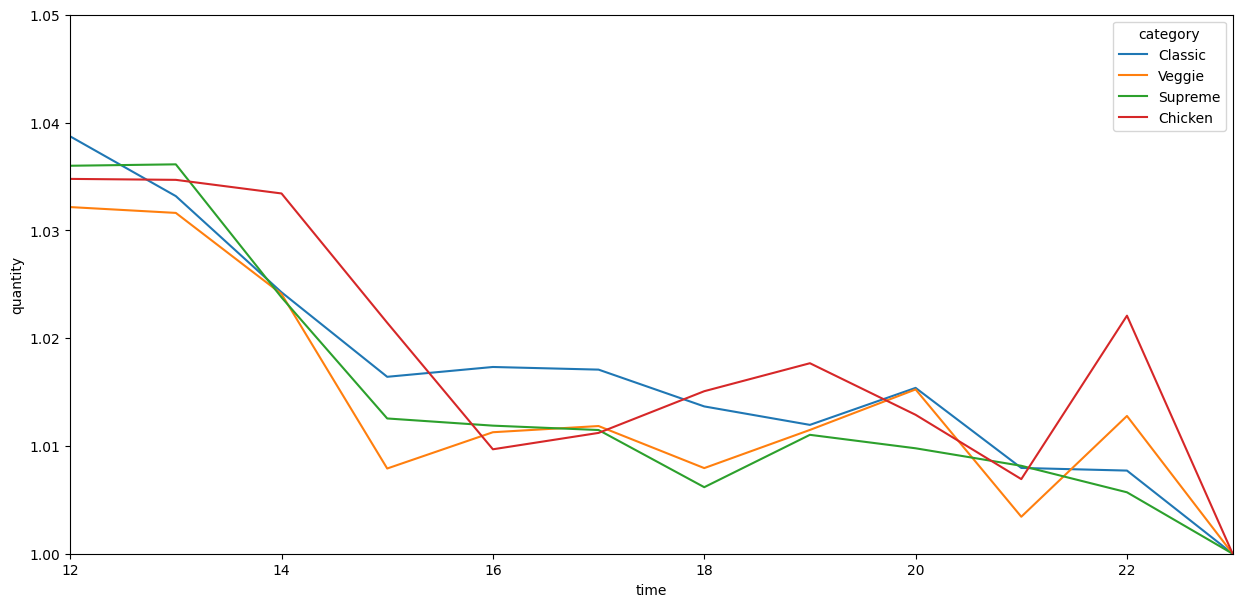

In [211]:
plt.subplots(figsize=(15, 7))
sns.lineplot(x=df.time.dt.hour, y=df.quantity, hue=df.category, errorbar=None)

plt.xlim(12, 23)
plt.ylim(1, 1.05)